In [1]:
from utils import *
from extract_feature_AE import *
from extract_feature_PCA import *

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

import warnings
from sklearn.exceptions import FitFailedWarning, DataConversionWarning

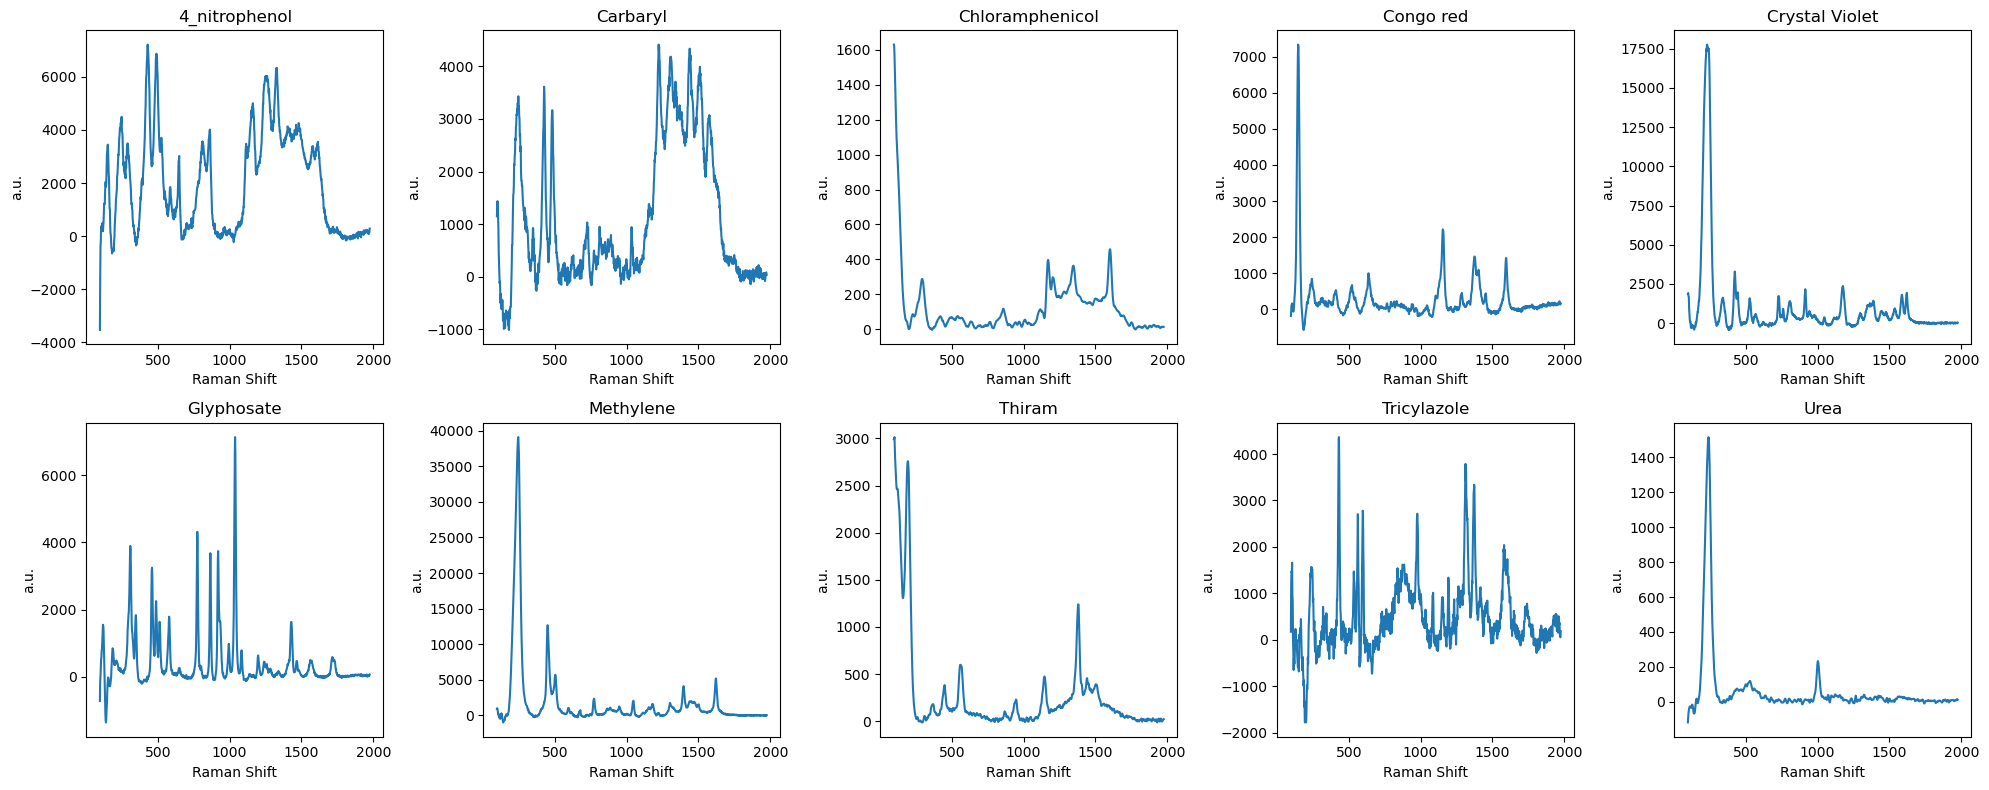

In [4]:
plot_data(paths, labels, file_names[1], 2, 5, figsize = (20, 8))

In [5]:
X, y = make_data(paths)
print(X.shape, y.shape)


(50, 2047) (50, 1)


In [6]:
X_min = X.min(axis=0, keepdims=True)
X_max = X.max(axis=0, keepdims=True)
X_mean = np.mean(X)
X_std = np.std(X)

In [7]:
# X= Norm(X, X_min, X_max, X_mean, X_std)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, stratify=y, shuffle= True, random_state= 42)

In [9]:
X_min = X_train.min(axis=0, keepdims=True)
X_max = X_train.max(axis=0, keepdims=True)
X_mean = np.mean(X_train)
X_std = np.std(X_train)

In [10]:
X_train = Norm(X_train, X_min, X_max, X_mean, X_std)
X_test  = Norm(X_test, X_min, X_max, X_mean, X_std)

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(30, 2047) (30, 1) (20, 2047) (20, 1)


In [12]:
Grid_search_model(X_train,y_train, cv = 3)

Best parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}, score: 0.83
Time taken for Logistic Regression: 2.67 seconds

Best parameters for SVM: {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}, score: 0.80
Time taken for SVM: 2.59 seconds

Best parameters for KNN: {'algorithm': 'auto', 'metric': 'correlation', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}, score: 0.87
Time taken for KNN: 12.88 seconds

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}, score: 0.50
Time taken for Decision Tree: 12.01 seconds

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}, score: 0.77
Time taken for Random Forest: 344.67 seconds

Best parameters for Naive Bayes: {'alpha': 0.01}, score: 0.10
Time taken for Naive

In [13]:
models = [LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear'),
          SVC(C = 1.0, degree = 2, gamma = 'scale', shrinking = True,  probability=True, kernel = 'linear'),
          KNeighborsClassifier(algorithm = 'auto',p = 1, weights = 'distance', n_neighbors = 3, metric = 'cosine'),
          DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split = 5, splitter= 'random',  random_state = 42),
          RandomForestClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 100,  random_state = 42),
          BernoulliNB(alpha=0.1)]

In [20]:
# from test_all_models import test_models
test_models(X_train, y_train, X_test, y_test)

LogisticRegression


NameError: name 'X' is not defined

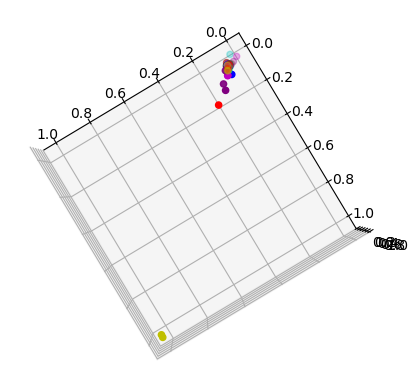

In [ ]:
visualize(X, y, option = '3d', eval = 90, azim = 60, legend = False)